# **Início** 
Este projeto tem como objetivo apresentar uma análise exploratória de dados no [dataset](https://www.kaggle.com/thomaskonstantin/top-850-guitar-tabs ) encontrado no Kaggle. 

O desenvolvimento dessa atividade é requisito de aprovação para a disciplina, Introdução à Análise de Dados, ministrada pelo Prof Luciano Barbosa, do programa de Especialização/Residência em Visão Computacional pelo CIn/UFPE em parceria com o SiDi/Samsung. 

Esse dataset reúne dados sobre Cifras de instrumentos de corda (guitarra/violão/baixo, a princípio) para músicos. A cifra, de certa forma, é mais fácil de ler, se comparada a partitura (muito utilizada por orquestras e música clássica), sendo assim, as cifras são bastante utilizadas por músicos iniciantes e/ou entusiastas. 

A escolha desse tema, é pelo fato do autor do projeto, ser um entusiasta, conhecer e tocar violão/guitarra a mais de 10 anos e continua estudando/aprendendo músicas com o auxílio de cifras. 

As variáveis encontradas no dataset são:


*   1 - Artist: Nome do artista
*   2 - Song name: O nome da música
*   3 - Song Rating (Avaliação da música): O número de usuários que avaliaram esta música (página da cifra que contém a música) com 5 estrelas em 5.
* 4 - Song Hits: Número de acessos (o número de visualizações)
* 5 - Page type: Que tipo de notas a página continha Guia / Chords / GP etc.
* 6 - Difficulty: Quão difíceis são os acordes/tabs (iniciante, intermediario e avançado)
* 7 - Key: Tom da música
* 8 - Capo: Se você precisa de um capo para tocar a música e em que traste você aplica o capo. 
* 9 - Tuning: Afinação do instrumento.

A partir dessas variáveis e da análise podemos tentar responder: 

*    O que leva os "músicos" a aprenderem uma música?  

# 1 - **Introdução**

Vamos iniciar importando as bibliotecas e o dataset. Além disso, vamos observar o comportamento do dataset, com os tipos de dados das colunas, quantidades e possíveis erros. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


base = pd.read_csv("/content/drive/MyDrive/projeto_ad_vinicius_dantas/gutiarDB.csv")

In [2]:
#Verificando algumas informações sobre as colunas
base.head()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
0,Jeff Buckley,Hallelujah,"40,045","31,174,526",Chords,novice,Db,1st fret,E A D G B E
1,Ed Sheeran,Perfect,"31,694","25,794,778",Chords,novice,Ab,1st fret,E A D G B E
2,John Legend,All Of Me,"20,169","25,653,362",Chords,novice,Fm,1st fret,E A D G B E
3,Passenger,Let Her Go,"17,267","24,556,593",Chords,novice,Em,7th fret,E A D G B E
4,Led Zeppelin,Stairway To Heaven,"11,839","20,762,763",Tab,intermediate,Am,No Capo,E A D G B E


In [3]:
base.shape

(850, 9)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       850 non-null    object
 1   Song Name    850 non-null    object
 2   Song Rating  850 non-null    object
 3   Song Hits    850 non-null    object
 4   Page Type    850 non-null    object
 5   Difficulty   850 non-null    object
 6   Key          850 non-null    object
 7   Capo         850 non-null    object
 8   Tuning       850 non-null    object
dtypes: object(9)
memory usage: 59.9+ KB


Percebemos até aqui que todos os dados são do tipo "objeto" que é associado à String, além disso, de 850 entradas não há nenhuma nula/vazia. Porém, duas colunas (Song Rating e Song Hits) apresentam quantidades, elas apresentam a quantidade de votos 5 que uma página de cifra (de determinada música) recebeu e a quantidade de acessos (visualizações). É mais interessante trabalhar com essas colunas como númericas. 

In [5]:
#Substituindo a virgula por vazio nas colunas, para depois transformar em inteiro
base["Song Rating"] = base["Song Rating"].str.replace(',', '')
base["Song Hits"] = base["Song Hits"].str.replace(',', '')
base.head()


,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E


In [6]:
#Convertendo os dados em inteiro
base["Song Rating"] = base["Song Rating"].astype(int)
base["Song Hits"] = base["Song Hits"].astype(int)

In [7]:
base.describe().round(1)
#Alguns dados estatisticos com o describe, ele exibe apenas as colunas com valores númericos. 

,Song Rating,Song Hits
count,850.0,850.0
mean,2263.7,3281441.1
std,3210.9,3041135.0
min,7.0,1405613.0
25%,582.0,1721466.0
50%,1260.5,2280788.0
75%,2677.0,3416779.0
max,40045.0,31174526.0


In [8]:
#Adicionando o parametro object é possivel identificar mais detalhes sobre os dados que não são númericos. 
base.describe(include=[object])

,Artist,Song Name,Page Type,Difficulty,Key,Capo,Tuning
count,850,850,850,850,850,850,850
unique,342,752,5,6,30,16,18
top,Ed Sheeran,Wonderwall,Chords,intermediate,Db,No Capo,E A D G B E
freq,27,4,680,510,235,549,616


A função describe retorna "indicadores" diferentes para valores do tipo object. Temos a quantidade (count), inicialmente, quantos valores únicos (unique) e aqui já podemos perceber 342 artistas diferentes na base de dados. 

Porém, algo que chama atenção, inicialmente, é que possuem 18 valores únicos na coluna de afinação (Tuning). É possível combinar diferentes afinações, mas não é muito comum. Normalmente, é alterado para 2 ou 3 tons abaixo da afinação padrão que é (EADGBE) e esse padrão indica da 6ª à 1ª corda (de cima para baixo).

Podemos observar, também, que há uma maior frequência (freq) em páginas com acordes, de dificuldade intermediaria, sem capo e de afinação padrão. Essas são características interessantes para quem é iniciante. Não temos detalhes do que é preciso para considerar o nível de dificuldade da música. Mas, ela se está como Chords (Acordes), não usar [capo](https://pt.wikipedia.org/wiki/Capo) e usar a afinação padrão já facilita e muito "a vida" de um iniciante.  

Vamos observar mais alguns pontos:

A primeira coisa que é interessante observar é relação da dificuldade com a afinação. Pois, é comum, iniciantes utilizarem a afinação padrão, procurar músicas com a afinação padrão e "fugir" daquelas que usam outra afinação, pois inicialmente é mais "complicado" de entender, é preciso ajustar uma ou mais cordas, (foi assim para o autor desta análise e muitos que iniciaram com ele) ainda que com o auxílio dos smartphones os [afinadores](https://pt.wikipedia.org/wiki/Afinador) estejam mais acessíveis.   

Mas a princípio, são 3 dificuldades e a linha unique indica 6, vamos observar essa coluna e a coluna de afinação. 

In [9]:
base["Difficulty"].value_counts()

intermediate    510
novice          326
novic             5
advanced          5
intermediat       3
advance           1
Name: Difficulty, dtype: int64

In [10]:
base["Tuning"].value_counts()

 E A D G B E          616
 E A D G B             95
E A D G B E            94
 Eb Ab Db Gb Bb Eb     22
 Eb Ab Db Gb Bb E       5
 G C E A                2
 C G C F A              2
 D G C F A              2
 Db Ab Db Gb Bb E       2
 D A D G B              2
 C G C F A D            1
 C# F# B E G# C#        1
 D A D G B E            1
 E A D                  1
 A E A D F#             1
 D G C F A D            1
 E A D G                1
 Db Ab Db Gb Bb Eb      1
Name: Tuning, dtype: int64

A partir dessa visualização da contagem de cada valor presente nas colunas (Tuning e Difficulty) podemos observar mais alguns detalhes. 

Com a coluna Difficulty, os valores estão "dobrados" pois há erro na escrita dos 3 valores. Podemos afirmar que são apenas 3 níveis de dificuldade: Iniciante (Novice), Intermediário (Intermediate) e Avançado (Advanced).

Na coluna Tuning há 18 valores. A primeira informação "estranha" é a mesma afinação (a afinação padrão) se repetir, a principio há um recuo (não há um espaço inicial) em uma delas. Esse espaço está presente em todas as outras.
Além disso, há valores que apresentam 4, 5 e 6 tons na afinação, isso representa cada uma das cordas do instrumento. É comum, violão, guitarra e baixo de 6 cordas, mas não é comum, violão e guitarra de 4 ou 5 cordas. Possivelmente, esses valores apresentam afinação para baixo ou algum outro instrumento (cavaquinho, ukulele, que possuem 4 cordas), por exemplo. E há ainda um valor com apenas 3 tons, esse é o mais "estranho" de todos. Vamos observar com mais detalhes cada um deles e realizar uma possível correção dessas informações.  

# 2 - **Correção de informações**

In [11]:
# Vamos ajustar as informações da coluna Difficulty e corrigir as palavras com a escrita errada.
base["Difficulty"] = base["Difficulty"].replace(["novic", "intermediat", "advance"], ["novice", "intermediate", "advanced"])
base["Difficulty"].value_counts()

intermediate    513
novice          331
advanced          6
Name: Difficulty, dtype: int64

In [12]:
# Vamos ajustar agora o recuo na coluna de Afinação
base["Tuning"] = base["Tuning"].replace(["E A D G B E"], " E A D G B E")
base["Tuning"].value_counts()

 E A D G B E          710
 E A D G B             95
 Eb Ab Db Gb Bb Eb     22
 Eb Ab Db Gb Bb E       5
 D G C F A              2
 G C E A                2
 C G C F A              2
 Db Ab Db Gb Bb E       2
 D A D G B              2
 C G C F A D            1
 C# F# B E G# C#        1
 D A D G B E            1
 E A D                  1
 A E A D F#             1
 D G C F A D            1
 E A D G                1
 Db Ab Db Gb Bb Eb      1
Name: Tuning, dtype: int64

A substitiuição dos valores foi feita. Mas, ainda na coluna de Dificuldade, há uma informação que apresenta apenas 3 tons (E A D) vamos observar melhor essa coluna e as demais que apresentam 4 ou 5 tons, há algo que identifique que são afinações de outro instrumento? 
Vamos observar!

In [13]:
base[base["Tuning"] == " E A D"]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning


Na tentativa de entender sobre as afinações de 3, 4 e 5 cordas. Foi percebido mais detalhes sobre os valores dessa coluna em si. O primeiro deles é que além de um espaço inicial, em muitos valores há um espaço no final da string. O value_counts() nessa coluna, informa que há 1 valor na afinação E A D, mas ao tentar exibir, não retornou nada. Porém, ao colocar um espaço no final: 

In [14]:
base[base["Tuning"] == " E A D "]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
810,ZZ Top,Sharp Dressed Man,49,1439592,Bass,intermediate,Db,No Capo,E A D


Retornou o valor que indicava no value_counts() e, é perceptivel também que, muito provavelmente, está faltando uma nota (ou corda) nessa afinação, pois, o Page Type apresenta Bass (Baixo) e não há baixo com 3 cordas. Dessa forma, poderiamos eliminar essa linha, sem muito prejuízo, não é uma música muito avaliada (Song Rating) mas ainda assim possui muitas visualizações (Song Hits). Porém, vamos observar os dados para Page Type com o valor Bass e tentar corrigir a informação. 

In [15]:
#base.drop([810], axis=0, inplace=True) se fossemos eliminar a linha apresentada acima

In [16]:
base[base["Page Type"] == "Bass"].value_counts()

Artist        Song Name                Song Rating  Song Hits  Page Type  Difficulty    Key  Capo     Tuning      
ZZ Top        Tush                     29           1416815    Bass       intermediate  Db   No Capo   E A D G B E    1
              Sharp Dressed Man        49           1439592    Bass       intermediate  Db   No Capo   E A D          1
              La Grange                54           1454374    Bass       intermediate  Db   No Capo   E A D G B E    1
              Gimme All Your Lovin     28           1416394    Bass       intermediate  Db   No Capo   E A D G B E    1
Young MC      Bust A Move              29           1418099    Bass       intermediate  Db   No Capo   E A D G B E    1
Yes           Roundabout               59           1641919    Bass       intermediate  Db   No Capo   E A D G B E    1
              Long Distance Runaround  17           1405613    Bass       intermediate  Db   No Capo   E A D G B E    1
Neil Young    Heart Of Gold            31    

Ao observar as demais colunas para Baixo. Identificamos que a coluna Tuning aparesenta a afinação padrão, e ainda, que as demais músicas desse artista apresentam afinação com 6 cordas. Baseado nessas informações, podemos corrigir E A D para E A D G B E, considerando que as demais músicas do artista utilizam essa afinação em um Baixo. 

In [17]:
base["Tuning"] = base["Tuning"].replace([" E A D "]," E A D G B E")

In [18]:
base[base["Page Type"] == "Bass"].value_counts()

Artist        Song Name                Song Rating  Song Hits  Page Type  Difficulty    Key  Capo     Tuning      
ZZ Top        Tush                     29           1416815    Bass       intermediate  Db   No Capo   E A D G B E    1
              Sharp Dressed Man        49           1439592    Bass       intermediate  Db   No Capo   E A D G B E    1
              La Grange                54           1454374    Bass       intermediate  Db   No Capo   E A D G B E    1
              Gimme All Your Lovin     28           1416394    Bass       intermediate  Db   No Capo   E A D G B E    1
Young MC      Bust A Move              29           1418099    Bass       intermediate  Db   No Capo   E A D G B E    1
Yes           Roundabout               59           1641919    Bass       intermediate  Db   No Capo   E A D G B E    1
              Long Distance Runaround  17           1405613    Bass       intermediate  Db   No Capo   E A D G B E    1
Neil Young    Heart Of Gold            31    

In [19]:
#Remover o espaço nas informações coluna Tuning é interessante para que possamos construir as "querrys" e não se perder com os erros ou resultados vazios.
base["Tuning"] = base["Tuning"].str.lstrip()

Após essas correções nas colunas acima, é interessante verificar se há o mesmo tipo de "erro" nas demais colunas. Vamos observar: 

In [20]:
base["Key"].value_counts()

Db      235
 C       95
 G       86
 D       58
 Em      48
 Am      48
 A       41
 F       35
 E       26
 Bm      23
 Dm      17
 B       16
 F#m     14
 Eb      13
 Cm      12
 Bb      11
 Ab      10
 Db      10
 Bbm      9
 Ebm      8
 Gm       8
 C#m      7
 Fm       6
 F#       4
 Gb       3
 Abm      2
 C#       2
 A#m      1
 G#m      1
 D#m      1
Name: Key, dtype: int64

In [21]:
base[base["Key"] == "C"]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning


Podemos observar que na coluna Key, que corresponde ao Tom da música, há também um espaço inicial. Ao tentar buscar os registros com o tom de Dó "C" não tivemos retorno nenhum, mas o value_counts() identifica 95 valores correspondentes.

In [22]:
base[base["Key"] == " C"]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
6,Elvis Presley,Cant Help Falling In Love,19747,19857493,Chords,intermediate,C,2nd fret,E A D G B E
11,Bruno Mars,When I Was Your Man,14428,14687286,Chords,novice,C,No Capo,E A D G B E
19,Oasis,Dont Look Back In Anger,11981,12942507,Chords,novice,C,No Capo,E A D G B E
20,Train,Hey Soul Sister,6896,11729033,Chords,novice,C,4th fret,E A D G B E
24,Taylor Swift,Love Story,5966,11073935,Chords,novice,C,2nd fret,E A D G B E
...,...,...,...,...,...,...,...,...,...
685,Demi Lovato,Stone Cold,1746,1632764,Chords,intermediate,C,1st fret,E A D G B E
707,Ed Sheeran,Dive,702,1594205,Chords,novice,C,4th fret,E A D G B E
766,Westlife,More Than Words,193,1503488,Chords,novice,C,No Capo,Eb Ab Db Gb Bb Eb
776,near (Indonesia),Karna Su Sayang,144,1487052,Chords,intermediate,C,No Capo,E A D G B E


In [23]:
base["Capo"].value_counts()

No Capo      549
 1st fret     57
 2nd fret     57
 3rd fret     50
 4th fret     33
 3rd fre      17
 5th fret     17
 4th fre      16
 2nd fre      13
 1st fre      12
 6th fret      9
 7th fret      6
 5th fre       5
 7th fre       5
 6th fre       2
 8th fret      2
Name: Capo, dtype: int64

In [24]:
base[base["Capo"] == "1st fret"]


,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning


O mesmo acontece com a coluna Capo, esta coluna indica se para tocar é preciso usar o capotraste e em qual posição (qual traste) deve ser colocado. Esse é uma informação importante. De início, é mais fácil aprender a tocar sem se preocupar em adquirir um capo e/ou entender o seu funcionamento. 

É preciso ter uma bom conhecimento do instrumento, tom e formação de acordes. Ainda que a cifra indique o acorde de Sol "G", por exemplo, é apenas o formato do acorde, mas não irá soar como o Sol da afinação padrão e assim é preciso "posicionar" a voz no tom. 

E ainda, podemos perceber que há palavras com a escrita errada. Faltando a última letra. Vamos realizar essa correção também. 

In [25]:
base["Key"] = base["Key"].str.lstrip()
base["Capo"] = base["Capo"].str.lstrip()

In [26]:
base["Capo"] = base["Capo"].replace(["3rd fre", "4th fre", "2nd fre","1st fre", "5th fre", "7th fre", "6th fre"], ["3rd fret", "4th fret", "2nd fret","1st fret", "5th fret", "7th fret", "6th fret"])

In [27]:
base["Capo"].value_counts()

No Capo     549
2nd fret     70
1st fret     69
3rd fret     67
4th fret     49
5th fret     22
6th fret     11
7th fret     11
8th fret      2
Name: Capo, dtype: int64

In [28]:
base[base["Capo"] == "8th fret"]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning
69,James Blunt,Youre Beautiful,2970,6777892,Chords,novice,G,8th fret,E A D G B E
454,Tom Petty,Free Fallin,663,2190327,Chords,novice,F,8th fret,E A D G B E


Até aqui, aparentemente, não há mais nenhuma coluna que precise de correção, ou pelo menos alguma organização mínima. Vamos observar um pouco mais as informações que temos e investigar algumas possíveis relações. 

# 3 - **Visualizando as informações**

Vamos agora plotar alguns gráficos para continuarmos a análise de forma mais visual e inferir algo das informações. Como observado anteriormente, a maior parte das músicas, usam a afinação padrão. 

Quais as características mais comuns para as músicas serem consideradas, iniciantes, intermediária ou avançadas?

Há uma correlação positiva entre o número de acessos e a quantidade de votos 5 que uma música recebeu, aparentemente. Vamos observar. 

# 3.1 **Verificando a correlação entre as colunas Song Rating e Song Hits.**





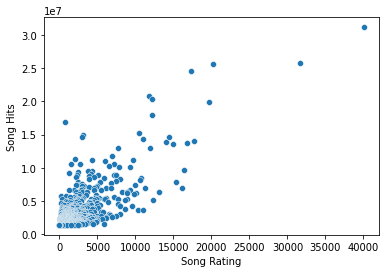

In [29]:
sns.scatterplot(data=base, x="Song Rating", y="Song Hits")

In [30]:
base.corr(method="spearman")

,Song Rating,Song Hits
Song Rating,1.000000,0.584442
Song Hits,0.584442,1.000000


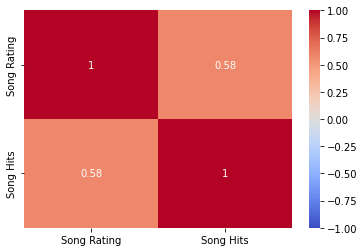

In [31]:
sns.heatmap(base.corr(method="spearman"), annot=True, vmin=-1, vmax=1,cmap='coolwarm')

In [32]:
base.corr() #metodo de pearson (padrão da função)

,Song Rating,Song Hits
Song Rating,1.00000,0.77382
Song Hits,0.77382,1.00000


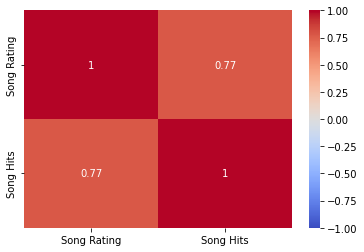

In [33]:
sns.heatmap(base.corr(), annot=True, vmin=-1, vmax=1,cmap='coolwarm')

Podemos observar que há uma correlação positiva entre as duas váriaveis. O heatmap nos dá uma boa visualiazação dessa correlação. A correlação de Speaman aponta uma correlação positiva não tão forte quanto a de Pearson.  Podemos entender que uma música com muitas visualizações não necessariamente é bem avaliada. 

No caso desse dataset é mais interessante observar a correlação de Spearman, pois os dados estão de certa forma ordenados. 
Já a correlação de Pearson avalia a relação linear entre variáveis contínuas e não podemos ver isso no caso desse dataset. 

 # 3.2 **Discretização e Normalização**

Vamos agora realizar discretização das colunas númericas e a normalização usando Min-Max. Essas são tarefas importantes no pré-processamento de dados, para que assim possamos agrupar e "escalar" os dados para serem trabalhados posteriormente. 

- **Discretização**

In [34]:
song_rating_disct_larg = pd.cut(base['Song Rating'], 4) #cut função para discretização pela largura 
base['song_r_disct_larg'] = song_rating_disct_larg
song_rating_disct_freq = pd.qcut(base['Song Rating'], 4) #qcut função para discretização pela frequência
base['song_r_disct_freq'] = song_rating_disct_freq

song_hits_disct_larg = pd.cut(base['Song Hits'], 4)
base['song_h_disct_larg'] = song_hits_disct_larg
song_hits_disct_freq = pd.qcut(base['Song Hits'], 4)
base['song_h_disct_freq'] = song_hits_disct_freq

base.head()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]"
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]"
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E,"(20026.0, 30035.5]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]"
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]"
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]"


Text(0, 0.5, 'Quantidade')

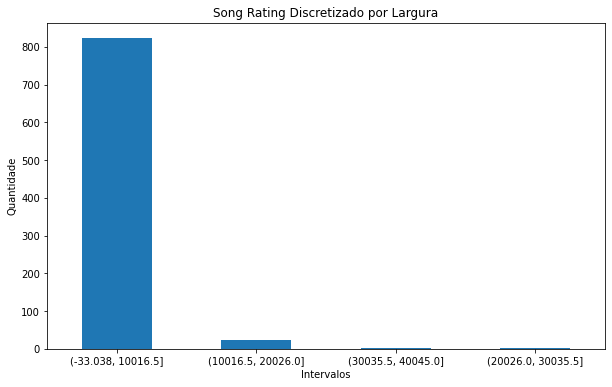

In [35]:
plt.figure(figsize=(10, 6))
counts = base['song_r_disct_larg'].value_counts()
counts.plot.bar(rot=0)
plt.title("Song Rating Discretizado por Largura")
plt.xlabel('Intervalos')
plt.ylabel('Quantidade')


Text(0, 0.5, 'Quantidade')

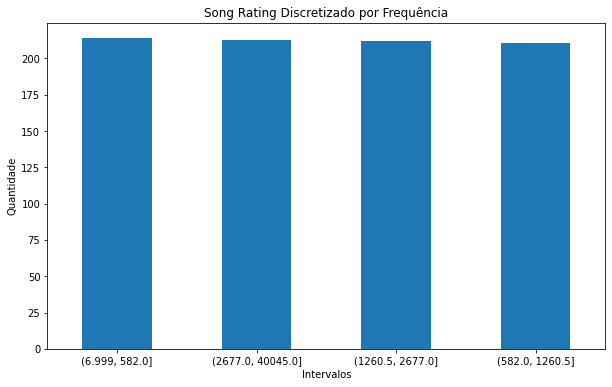

In [36]:
plt.figure(figsize=(10, 6))
counts = base['song_r_disct_freq'].value_counts()
counts.plot.bar(rot=0)
plt.title("Song Rating Discretizado por Frequência")
plt.xlabel('Intervalos')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

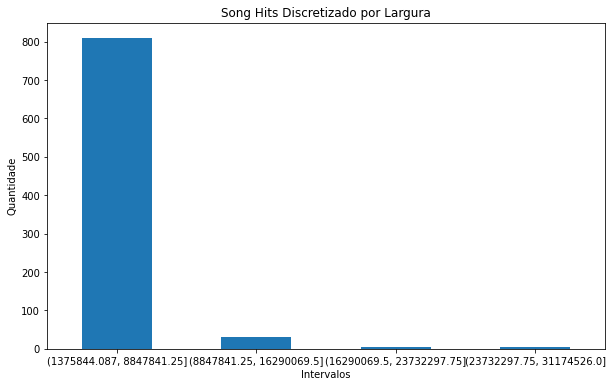

In [37]:
plt.figure(figsize=(10, 6))
counts = base['song_h_disct_larg'].value_counts()
counts.plot.bar(rot=0)
plt.title("Song Hits Discretizado por Largura")
plt.xlabel('Intervalos')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

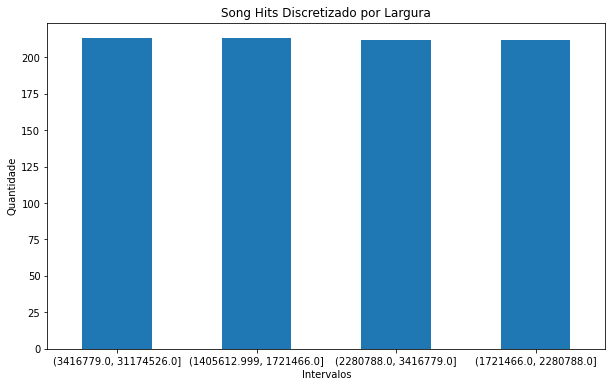

In [38]:
plt.figure(figsize=(10, 6))
counts = base['song_h_disct_freq'].value_counts()
counts.plot.bar(rot=0)
plt.title("Song Hits Discretizado por Largura")
plt.xlabel('Intervalos')
plt.ylabel('Quantidade')

 - **Normalização**

In [39]:
col = base['Song Hits']
col2 = base['Song Rating']
song_h = (col - col.min()) / (col.max() - col.min())
song_r = (col2 - col2.min()) / (col2.max() - col2.min())
base['song_h_norm'] = song_h
base['song_r_norm'] = song_r
 

In [40]:
base['song_h_norm'].describe()

count    850.000000
mean       0.063013
std        0.102158
min        0.000000
25%        0.010610
50%        0.029399
75%        0.067559
max        1.000000
Name: song_h_norm, dtype: float64

In [41]:
base['song_r_norm']

0      1.000000
1      0.791423
2      0.503572
3      0.431090
4      0.295519
         ...   
845    0.000400
846    0.000050
847    0.000000
848    0.060967
849    0.000250
Name: song_r_norm, Length: 850, dtype: float64

In [42]:
base.head()

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",1.000000,1.000000
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.819283,0.791423
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E,"(20026.0, 30035.5]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.814533,0.503572
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.777690,0.431090
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.650247,0.295519


# 3.3 **Visualizando Outliers**

Vamos agora realizar a visualização de outliers nas colunas númericas do nosso dataframe, Song Hits e Song Rating. 

**Z-Score Robusto**

In [43]:
base['Song Hits'].describe().round(1)

count         850.0
mean      3281441.1
std       3041135.0
min       1405613.0
25%       1721466.0
50%       2280788.0
75%       3416779.0
max      31174526.0
Name: Song Hits, dtype: float64

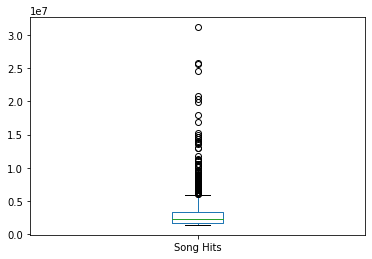

In [44]:
base['Song Hits'].plot.box()

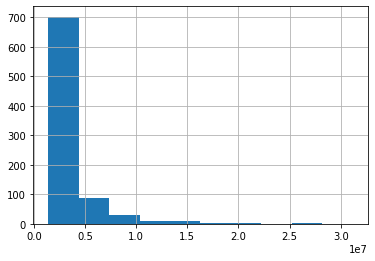

In [45]:
base['Song Hits'].hist()

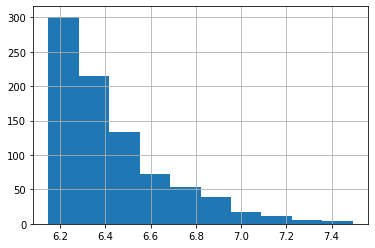

In [46]:
base['song_h_log'] = np.log10(base['Song Hits'])
base['song_h_log'].hist()

In [47]:
#mad manual
mad = np.abs(base['song_h_log'] - base['song_h_log'].median()).median()*(1/0.6745)
print(mad)

0.20388494238022187


In [48]:
#mad com a função pronta
base['song_h_log'].mad()

0.19160388907816758

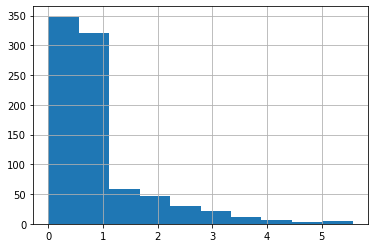

In [49]:
(abs(base['song_h_log']-base['song_h_log'].median())/mad).hist()

In [50]:
base[abs(base['song_h_log']-base['song_h_log'].median())/mad > 3.5]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",1.000000,1.000000,7.493800
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.819283,0.791423,7.411532
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E,"(20026.0, 30035.5]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.814533,0.503572,7.409144
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.777690,0.431090,7.390168
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.650247,0.295519,7.317285
5,Jason Mraz,Im Yours,12247,20326678,Chords,novice,B,4th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.635598,0.305710,7.308066
6,Elvis Presley,Cant Help Falling In Love,19747,19857493,Chords,intermediate,C,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.619837,0.493032,7.297924
7,Ed Sheeran,Thinking Out Loud,12130,17939245,Chords,novice,D,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.555399,0.302787,7.253804
8,Plain White T's,Airplane,695,16867243,Tab,intermediate,Gm,No Capo,E A D G B E,"(-33.038, 10016.5]","(582.0, 1260.5]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.519388,0.017184,7.227044
9,Coldplay,The Scientist,10523,15183884,Chords,novice,Bm,3rd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.462841,0.262650,7.181383


In [51]:
out_song_h = base[abs(base['song_h_log']-base['song_h_log'].median())/mad < 3.5]
print(len(out_song_h))

830


A partir do método do Z-Core Robusto os valores maiores que 3.5 são considerados OutLiers. Assim, foram exibidos as primeiras 20 linhas do Top 850, as páginas de cifras mais visitadas. 

- **Tukey**

In [52]:
base['Song Hits'].describe()

count    8.500000e+02
mean     3.281441e+06
std      3.041135e+06
min      1.405613e+06
25%      1.721466e+06
50%      2.280788e+06
75%      3.416779e+06
max      3.117453e+07
Name: Song Hits, dtype: float64

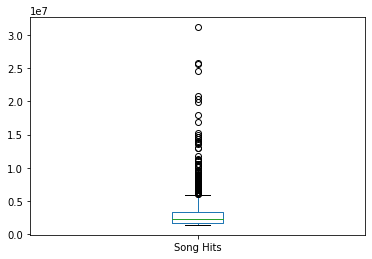

In [53]:
base['Song Hits'].plot.box()

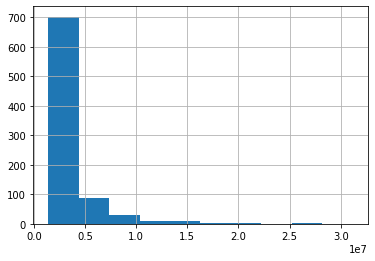

In [54]:
base['Song Hits'].hist()

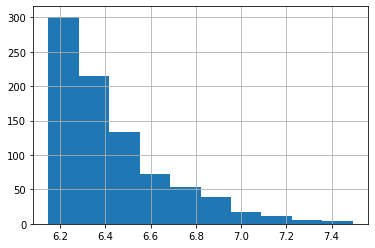

In [55]:
base['song_h_log'].hist()

In [56]:
#Calcular os intervalos
q1 = base['song_h_log'].quantile(q=0.25)
q3 = base['song_h_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.29771744155703406


In [57]:
#OutLiers: valores menores
base[base['song_h_log'] < (q1-(1.5*iqr))]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log


In [58]:
#Outliers: valores maiores
base[base['song_h_log'] > (q3+(1.5*iqr))]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",1.000000,1.000000,7.493800
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.819283,0.791423,7.411532
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E,"(20026.0, 30035.5]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.814533,0.503572,7.409144
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.777690,0.431090,7.390168
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.650247,0.295519,7.317285
5,Jason Mraz,Im Yours,12247,20326678,Chords,novice,B,4th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.635598,0.305710,7.308066
6,Elvis Presley,Cant Help Falling In Love,19747,19857493,Chords,intermediate,C,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.619837,0.493032,7.297924
7,Ed Sheeran,Thinking Out Loud,12130,17939245,Chords,novice,D,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.555399,0.302787,7.253804
8,Plain White T's,Airplane,695,16867243,Tab,intermediate,Gm,No Capo,E A D G B E,"(-33.038, 10016.5]","(582.0, 1260.5]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.519388,0.017184,7.227044
9,Coldplay,The Scientist,10523,15183884,Chords,novice,Bm,3rd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.462841,0.262650,7.181383


In [59]:
songs_h_t = base[(base['song_h_log'] < (q1-1.5*iqr)) & (base['song_h_log'] < (q3+1.5*iqr))]
len(songs_h_t)

0

- **Outliers usando razão de duas variáveis**

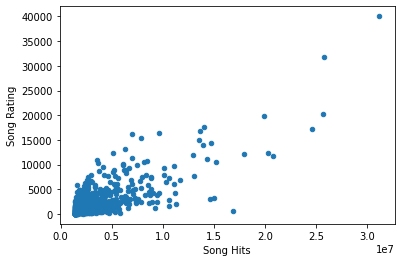

In [60]:
base.plot.scatter(x='Song Hits',y='Song Rating')

In [61]:
sh_sr = base['Song Hits'] / base['Song Rating']
sh_sr.describe()

count       850.000000
mean       4781.553506
std       12444.502699
min         270.590987
25%        1122.158432
50%        2050.819397
75%        3863.365597
max      200868.714286
dtype: float64

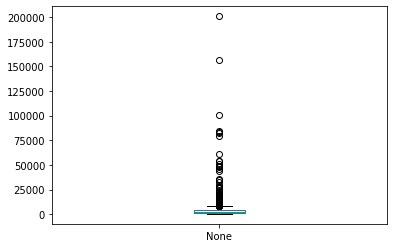

In [62]:
sh_sr.plot.box()

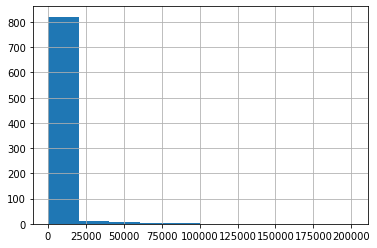

In [63]:
sh_sr.hist()
sh_sr_log = np.log10(sh_sr)

In [64]:
mad = abs(sh_sr_log - sh_sr_log.median()).median()*(1/0.6745)

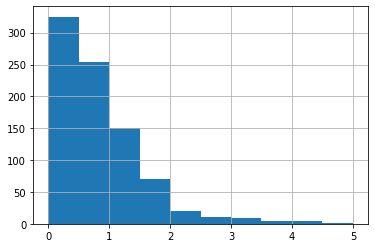

In [65]:
(abs(sh_sr_log-sh_sr_log.median())/mad).hist()

In [66]:
base[abs(sh_sr_log-sh_sr_log.median())/mad > 3.5]

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
448,Fiersa Besari,Waktu Yang Salah,41,2213119,Chords,novice,G,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1721466.0, 2280788.0]",0.027126,0.000849,6.345005
808,ZZ Top,Waitin For The Bus,17,1442989,Tab,intermediate,Db,No Capo,E A D G B,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.001256,0.000250,6.159263
823,ZZ Top,Legs,18,1424065,Tab,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000620,0.000275,6.153530
826,Neil Young,Unplugged Album,17,1422094,Chords,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000554,0.000250,6.152928
840,ZZ Top,Tube Snake Boogie,26,1412186,Tab,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000221,0.000475,6.149892
842,ZZ Top,My Heads In Mississippi Intro,14,1408236,Tab,intermediate,Db,No Capo,E A D G B,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000088,0.000175,6.148675
845,ZZ Top,Beer Drinkers And Hell Raisers,23,1406368,Chords,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000025,0.000400,6.148099
846,Weezer,Weezer Album,9,1406306,Tab,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000023,0.000050,6.148080
847,Misc Soundtrack,Mission Impossible 2 - Nyah,7,1406081,Tab,intermediate,Db,No Capo,E A D G B,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000016,0.000000,6.148010
849,Yes,Long Distance Runaround,17,1405613,Bass,intermediate,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.000000,0.000250,6.147866


In [67]:
qnt = base[abs(sh_sr_log-sh_sr_log.median())/mad < 3.5]
print(len(qnt))

840


Na visualização dos outliers entre as duas variáveis, percebemos que o retrono apresenta músicas que ainda que tenham muitas visualizações não possuem boa avaliação. 

Podemos perceber que mesmo com o log10 as colunas visualizadas, não se comportram como uma normal (podemos visualizar isso nos histogramas). Os resultados, certamente seriam outros, pois as técnicas utilizadas seguem esse princípio. 

# 3.4 **Visualizando Mais Dados**

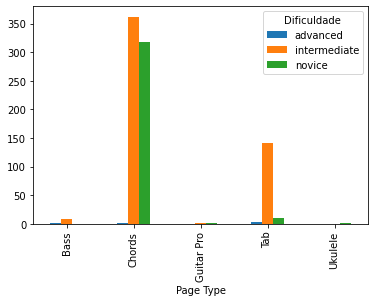

In [68]:
pg_df = pd.crosstab(index=base['Page Type'], columns=base['Difficulty'])
pg_df.plot.bar()
plt.legend(title = 'Dificuldade')
plt.show()

<Figure size 1080x576 with 0 Axes>

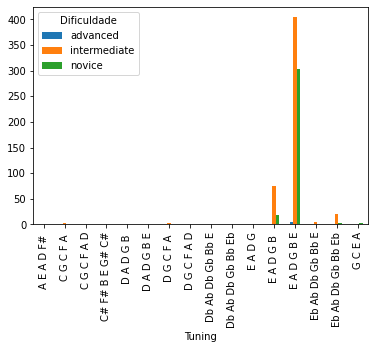

In [69]:
tab_dupla = pd.crosstab(index=base['Tuning'], columns=base['Difficulty'])
plt.figure(figsize=(15,8))
tab_dupla.plot.bar()
plt.legend(title = 'Dificuldade')
plt.show()

Observando os gráficos acima, podemos perceber que: a afinação com mais ocorrências é a afinação padrão (EADGBE) e o tipo de página é a de Acordes (Chords) e neste tipo de página os valores estão bem próximos. 

Porém, quando o PageType é Tab (Tabalatura) há uma boa diferença entre as dificuldades. O que faz sentido, pois ler tablatura, comparado a ler acordes não é nada fácil. Nos acordes é indicado qual realizar e é possível que o site mostre o desenho do acorde. 

Mesmo que nas tablaturas já seja em "desenho", há ainda detalhes de qual técnica realizar: bend, slide, vibrato, tapping, hammer-on e outras. A própria leitura é dificil, bem como a execução da técnica. Portanto, exige-se mais dedicação para ler e acompanhar uma música no tempo correto usando Tablaturas do que usando Acordes. 

Tablatura:

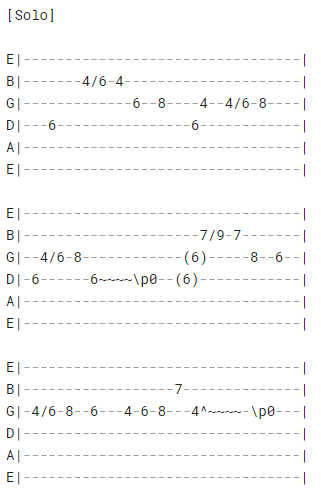

Acordes: 

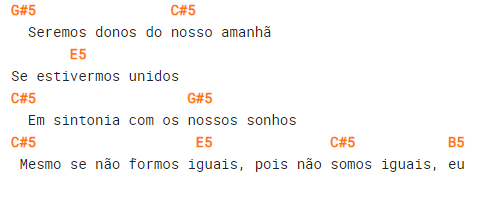
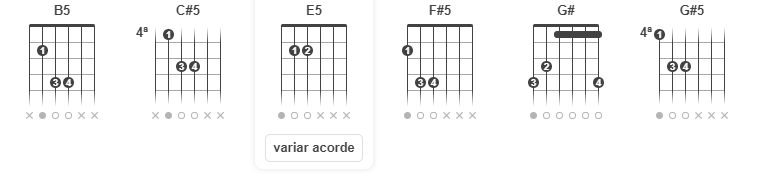

Uma outra variável que pode nos mostrar algo interessante sobre a dificuldade é a Capo. Como explicado anteriormente, iniciantes podem não saber usar ou gostar de usar capotraste, além de ter que comprar mais um "equipamento" e entender seu funcionamento. 

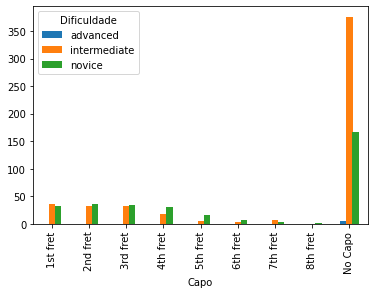

In [70]:
pg_df = pd.crosstab(index=base['Capo'], columns=base['Difficulty'])
pg_df.plot.bar()
plt.legend(title = 'Dificuldade')
plt.show()

O gráfico acima apresenta o que se acreditava. Mas, podemos perceber que as músicas consideradas avançadas, também não usam capotraste. Podemos, a partir das informações que temos, indicar quais são as caracteristicas das músicas Avançadas?

In [71]:
base[base['Difficulty'] == 'advanced']

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
36,Eric Clapton,Tears In Heaven,4188,9054292,Tab,advanced,A,No Capo,E A D G B E,"(-33.038, 10016.5]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.256935,0.104426,6.956854
134,Jason Mraz,Im Yours,211,4690834,Tab,advanced,Bm,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(3416779.0, 31174526.0]",0.110357,0.005095,6.671250
159,Metallica,Nothing Else Matters,1864,4194130,Tab,advanced,Db,No Capo,E A D G B,"(-33.038, 10016.5]","(1260.5, 2677.0]","(1375844.087, 8847841.25]","(3416779.0, 31174526.0]",0.093672,0.046381,6.622642
163,Queen,Bohemian Rhapsody,1677,4165302,Chords,advanced,Bb,No Capo,E A D G B E,"(-33.038, 10016.5]","(1260.5, 2677.0]","(1375844.087, 8847841.25]","(3416779.0, 31174526.0]",0.092704,0.041710,6.619646
587,Muse,Hysteria,685,1823282,Bass,advanced,Am,No Capo,E A D G,"(-33.038, 10016.5]","(582.0, 1260.5]","(1375844.087, 8847841.25]","(1721466.0, 2280788.0]",0.014030,0.016934,6.260854
700,Metallica,The Day That Never Comes,547,1613762,Tab,advanced,Db,No Capo,E A D G B E,"(-33.038, 10016.5]","(6.999, 582.0]","(1375844.087, 8847841.25]","(1405612.999, 1721466.0]",0.006992,0.013487,6.207839


Podemos perceber, que a partir desses dados, que há uma relação entre músicas consideredas Avançadas e páginas do tipo Tablaturas. Mas vamos observar também, os demais níveis de dificuldade.

In [72]:
base[base['Difficulty'] == 'intermediate'].head(6)

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
4,Led Zeppelin,Stairway To Heaven,11839,20762763,Tab,intermediate,Am,No Capo,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.650247,0.295519,7.317285
6,Elvis Presley,Cant Help Falling In Love,19747,19857493,Chords,intermediate,C,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.619837,0.493032,7.297924
8,Plain White T's,Airplane,695,16867243,Tab,intermediate,Gm,No Capo,E A D G B E,"(-33.038, 10016.5]","(582.0, 1260.5]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.519388,0.017184,7.227044
10,Adele,Someone Like You,3166,14972548,Chords,intermediate,A,No Capo,E A D G B E,"(-33.038, 10016.5]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.455742,0.078900,7.175296
12,Metallica,Nothing Else Matters,2999,14583222,Tab,intermediate,Em,No Capo,E A D G B E,"(-33.038, 10016.5]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.442663,0.074729,7.163853
18,Oasis,Wonderwall,7767,13017729,Chords,intermediate,F#m,2nd fret,E A D G B E,"(-33.038, 10016.5]","(2677.0, 40045.0]","(8847841.25, 16290069.5]","(3416779.0, 31174526.0]",0.390075,0.193816,7.114535


In [73]:
base[base['Difficulty'] == 'novice'].head(6)

,Artist,Song Name,Song Rating,Song Hits,Page Type,Difficulty,Key,Capo,Tuning,song_r_disct_larg,song_r_disct_freq,song_h_disct_larg,song_h_disct_freq,song_h_norm,song_r_norm,song_h_log
0,Jeff Buckley,Hallelujah,40045,31174526,Chords,novice,Db,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",1.000000,1.000000,7.493800
1,Ed Sheeran,Perfect,31694,25794778,Chords,novice,Ab,1st fret,E A D G B E,"(30035.5, 40045.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.819283,0.791423,7.411532
2,John Legend,All Of Me,20169,25653362,Chords,novice,Fm,1st fret,E A D G B E,"(20026.0, 30035.5]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.814533,0.503572,7.409144
3,Passenger,Let Her Go,17267,24556593,Chords,novice,Em,7th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(23732297.75, 31174526.0]","(3416779.0, 31174526.0]",0.777690,0.431090,7.390168
5,Jason Mraz,Im Yours,12247,20326678,Chords,novice,B,4th fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.635598,0.305710,7.308066
7,Ed Sheeran,Thinking Out Loud,12130,17939245,Chords,novice,D,2nd fret,E A D G B E,"(10016.5, 20026.0]","(2677.0, 40045.0]","(16290069.5, 23732297.75]","(3416779.0, 31174526.0]",0.555399,0.302787,7.253804


Após observar essas características. Percebemos que as músicas consideradas Iniciantes (novice) são todas do tipo de páginas de acordes, mas a surpresa está na coluna Capo, todas essas músicas utilizam capotraste.

Ao observar o resultado do nível Intermediário temos uma alternância nas colunas Capo e PageType. 

Então, provavelmente, o nível de dificuldade da música, está mais relacionado com a forma de execução dela (Page Type) do que com o uso de capotraste, pois embora use, a execução é igual: apenas Acordes (Chords). 

Foi observado, também, músicas do mesmo Artista com dificuldades diferentes. Não seria interessante remover essas linhas "duplicadas", pois é muito comum nesse tipo de site (de onde foi extraída as informações do dataset) uma música apresentar diferentes níveis de dificuldades, e com isso, páginas diferentes. Pois, em níveis diferentes apresentam mais ou menos detalhes para a execução da música. 


In [74]:
base.groupby('Difficulty')['Song Hits'].mean()

Difficulty
advanced        4.256934e+06
intermediate    2.839772e+06
novice          3.948278e+06
Name: Song Hits, dtype: float64

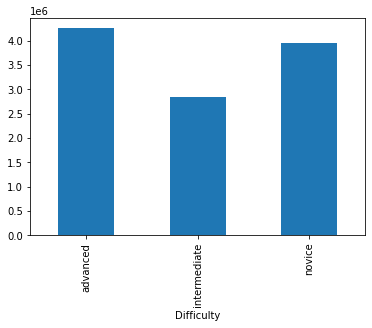

In [75]:
df_sh = base.groupby('Difficulty')['Song Hits'].mean()
df_sh.plot.bar()

Os dados acima, apontam que a média de acessos a uma página é maior nas músicas consideradas Avançadas. O que faz sentido, pois quanto maior a dificuldade da música, provavelmente, iremos acessa-la mais vezes, para entender e conseguir aprender os detalhes. Quanto à uma música considerada iniciante ou intermediária podemos acessa-la poucas vezes e já conseguir aprende-la. 

Por exemplo, [Ainda é Cedo da Banda Legião Urbana](https://www.cifraclub.com.br/legiao-urbana/ainda-cedo/) é mais fácil se comparado à música [Sapato Velho da Banda Roupa Nova](https://www.cifraclub.com.br/roupa-nova/sapato-velho/). 

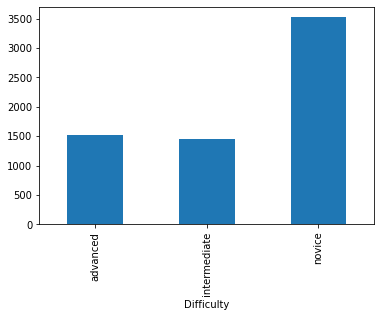

In [76]:
df_sh = base.groupby('Difficulty')['Song Rating'].mean()
df_sh.plot.bar()

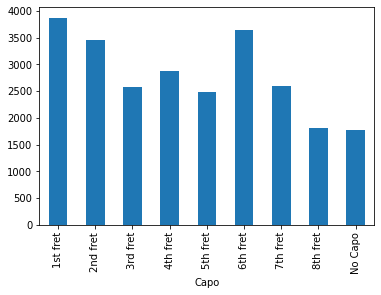

In [77]:
cp_sh = base.groupby('Capo')['Song Rating'].mean()
cp_sh.plot.bar()

A realização dessa análise consguiu apresentar informações interessantes sobre o dataset. Além disso, foi de suma importância para praticar e fixar o conteúdo apresentado na disciplina de Introdução à Análise de Dados. 



**E a pergunta inicial: O que leva um "músico" a aprender uma música?**

A partir das informações que temos é possivel perceber que existem alguns fatores que cotribuem para isso. A afinação (Tuning) padrão (EADGBE) é a mais marcante das variáveis. E faz sentido, alterar a afinação do instrumento é muito "específico" ou nichado, mais comum em bandas de Metal e suas derivações, onde a afinação é mais baixa que a padrão, provocando um som mais grave e "sujo", a exemplo da banda [Slipknot](https://www.youtube.com/watch?v=RyZrFgE153M) usa uma afinação em B (Si) ou A (Lá).

As músicas "pop" raramente mudam a afinação, será que por isso se tornam Pop (Populares)? Pela facilidade de entender/tocar, melodias relativamente simples e assim fácil de reproduzir e compartilhar na internet?

Além disso, as páginas do tipo Acordes (Chords) apontam maior quantidade. Como já mencionado anteriormente, esse tipo de página é mais fácil de ler/entender e reproduzir/acompanhar. É possível que com poucas semanas (dependendo da dedicação) um iniciante consiga acompanhar uma música lendo a cifra numa página desse tipo. Dificilmente isso vai acontecer com uma página do tipo Tablatura. As técnicas envolvidas pedem ainda mais dedicação, e a execução precisa ser bem feita para que a nota possa soar da forma adequada, um bend vai soar diferente de um slide. 

A princípio, a partir dos dados, seriam essas as principais características (Afinação Padrão e Páginas do tipo Acorde). Uma outra, seria o uso do capotraste, há muitas músicas que possem capotraste em alguma traste. O acesso a esses objetos pode ser mais fácil hoje em dia (quando comecei não era fácil) porém, utilizar não quer dizer que entende o funcionamento. Mas ainda assim, foi uma caracteristica presente em muitas músicas do conjuto de dados analisado, mas não parece influenciar tanto na dificuldade ou e levar um músico a aprender ou não determinada música. 


# 4 - **Conclusão**

A análise, ainda que inicial, provocou uma mudança de comportamento no autor em relação aos dados, como estes se comportam e como provavelmente são entregues a ele. Por isso, para a realização de um trabalho/atividade futura seria interessante retirar as informações do site [CifraClub](https://www.cifraclub.com.br/), que é brasileiro, e perceber o comportamento dos dados. E avaliar os resultados com os dessa análise. 